In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Import Dataset
insurance = pd.read_csv('insurance_dataset.csv')
insurance.head()

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46,male,21.45,5,yes,southeast,Diabetes,NaN,Never,Blue collar,Premium,20460.307669
1,25,female,25.38,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218
2,38,male,44.88,2,yes,southwest,NaN,High blood pressure,Occasionally,Blue collar,Premium,20204.476302
3,25,male,19.89,0,no,northwest,NaN,Diabetes,Rarely,White collar,Standard,11789.029843
4,49,male,38.21,3,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838


In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   age                     1000000 non-null  int64  
 1   gender                  1000000 non-null  object 
 2   bmi                     1000000 non-null  float64
 3   children                1000000 non-null  int64  
 4   smoker                  1000000 non-null  object 
 5   region                  1000000 non-null  object 
 6   medical_history         749238 non-null   object 
 7   family_medical_history  749596 non-null   object 
 8   exercise_frequency      1000000 non-null  object 
 9   occupation              1000000 non-null  object 
 10  coverage_level          1000000 non-null  object 
 11  charges                 1000000 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 91.6+ MB


In [5]:
insurance.describe()

,age,bmi,children,charges
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,41.495282,34.001839,2.499886,16735.117481
std,13.855189,9.231680,1.707679,4415.808211
min,18.000000,18.000000,0.000000,3445.011643
25%,29.000000,26.020000,1.000000,13600.372379
50%,41.000000,34.000000,2.000000,16622.127973
75%,53.000000,41.990000,4.000000,19781.465410
max,65.000000,50.000000,5.000000,32561.560374


In [6]:
insurance.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region',
       'medical_history', 'family_medical_history', 'exercise_frequency',
       'occupation', 'coverage_level', 'charges'],
      dtype='object')

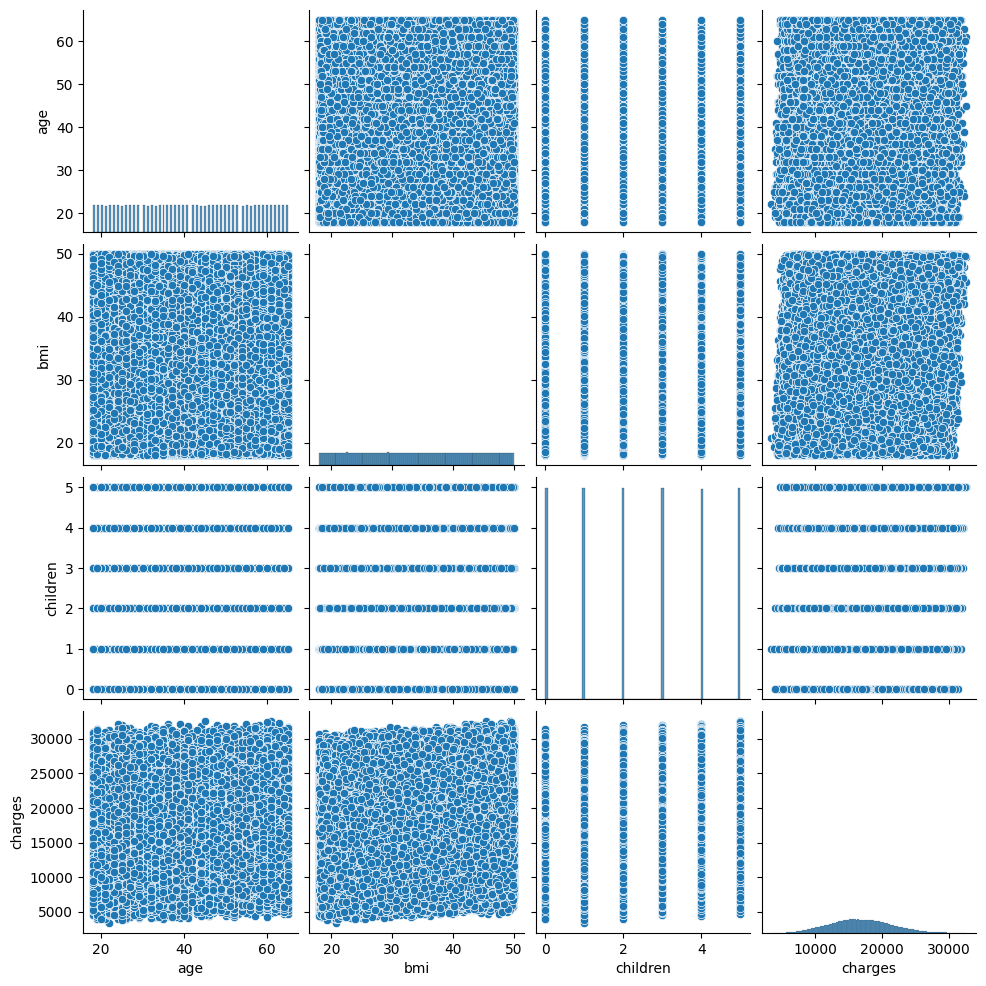

In [7]:
sns.pairplot(insurance)

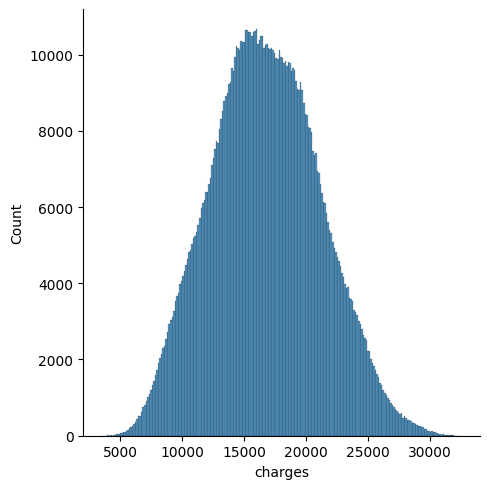

In [8]:
sns.displot(insurance['charges'])

In [9]:
sex_mapping = {'male': 1, 'female': 0}
smoker_mapping = {'yes': 1, 'no': 0}
region_mapping = {'northeast': 1, 'northwest': 2, 'southeast': 3, 'southwest': 4}

insurance['region'] = insurance['region'].map(region_mapping)
insurance['gender'] = insurance['gender'].map(sex_mapping)
insurance['smoker']=insurance['smoker'].map(smoker_mapping)
insurance['medical_history']=insurance['medical_history'].astype('category').cat.codes
insurance['family_medical_history']=insurance['family_medical_history'].astype('category').cat.codes
insurance['exercise_frequency']=insurance['exercise_frequency'].astype('category').cat.codes
insurance['occupation']=insurance['occupation'].astype('category').cat.codes
insurance['coverage_level']=insurance['coverage_level'].astype('category').cat.codes

<Axes: >

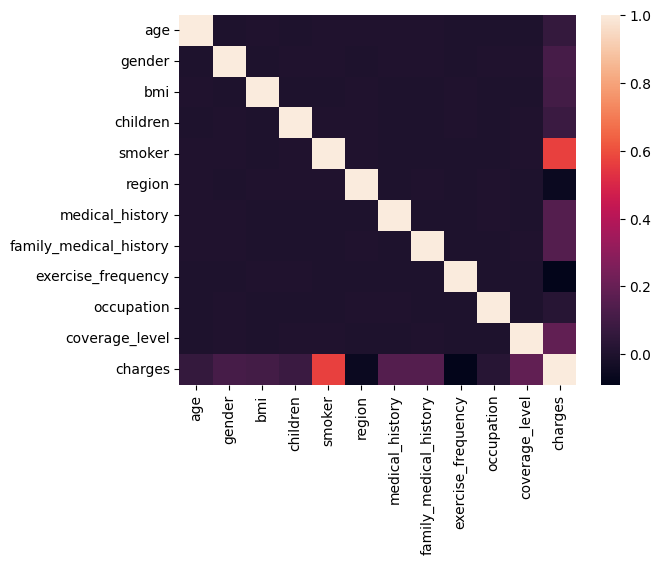

In [10]:
sns.heatmap(insurance.corr())

In [11]:
X = insurance[['age', 'gender', 'bmi', 'children', 'smoker', 'region',
       'medical_history', 'family_medical_history', 'exercise_frequency',
       'occupation', 'coverage_level']]
y = insurance['charges']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [14]:
# Creating the model
from sklearn.linear_model import LinearRegression

In [15]:
lm = LinearRegression()

In [16]:
lm.fit(X_train,y_train)

LinearRegression()

## Model Evaluation

In [17]:
# print the intercept
print(lm.intercept_)

9991.579008273053


In [18]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
age,19.973979
gender,990.433444
bmi,50.617964
children,199.574716
smoker,4998.960504
region,-216.956007
medical_history,599.431406
family_medical_history,604.048382
exercise_frequency,-347.844457
occupation,104.915946


## Prediction

In [19]:
predictions = lm.predict(X_test)

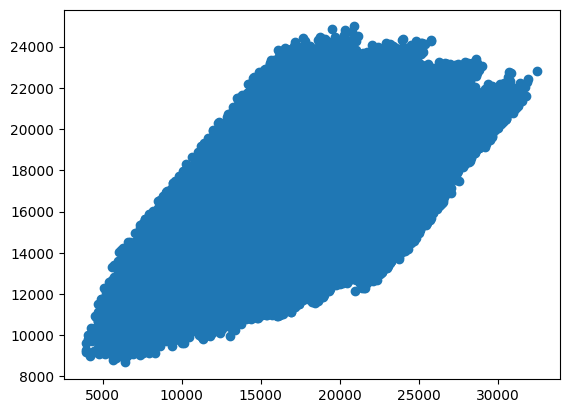

In [20]:
plt.scatter(y_test,predictions)

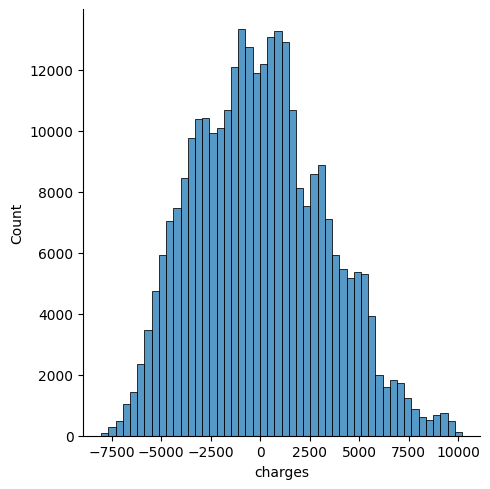

In [21]:
sns.displot((y_test-predictions),bins=50);

## Evaluation

In [22]:
from sklearn import metrics

In [23]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2664.618496510377
MSE: 10745591.789641025
RMSE: 3278.0469474430997
